# Advanced Automation Project


</p>Este projeto foi realizado por:</p>

<p> João Rosado, nº 96409 </p>

# Data Processing

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

url='https://raw.githubusercontent.com/Joao-Rosado/AA_Project/main/data/dataset.csv'

#read csv file
database = pd.read_csv(url)

#as the database as over 114000 elements, for practical reasons, it is reduced to 15000 random elements
tracks_base = database.sample(n=15000, random_state=20)

tracks_base.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
57269,57269,1L6aWPr4XyMKOm6BlGe1uz,Stevie Wonder,Best Christmas Playlist Ever 2022,Silver Bells,0,142560,False,0.409,0.336,...,-10.479,1,0.0301,0.383000,0.000000,0.1500,0.549,114.590,3,indie
91581,91581,25naGBZ4ZdgPVa54RH3ZfP,The Beach Boys,Christmas Eve At Home,Little Saint Nick - 1991 Remix,0,118840,False,0.602,0.553,...,-9.336,1,0.0328,0.108000,0.000000,0.0512,0.971,130.594,4,rock
46362,46362,0Z2NiMOKlPxBNjecKIn0It,Mental Theo,Shallow,Shallow,20,197311,False,0.434,0.776,...,-4.255,1,0.0350,0.344000,0.000076,0.3560,0.127,149.923,3,happy
48796,48796,23h5dBCGwvQrKpRGJhh53p,BBS Paranoicos,Cruces,Cosa de Gusanos,31,226782,False,0.421,0.910,...,-2.936,0,0.0490,0.000009,0.008460,0.2580,0.722,170.005,4,hardcore
12698,12698,1YHZDfqcj4o0scuWw39ehw,Grasshopper,Back To Black Series - YOU ARE EVERYTHING,夜了,20,313200,False,0.700,0.515,...,-7.712,0,0.0236,0.257000,0.000000,0.2290,0.664,98.171,4,cantopop


In [2]:
#encode categorical variables and discard Unnamed: 0.1, Unnamed: 0, track_id, artists, album_name and track_name which are not relevant to the analysis
tracks = pd.get_dummies(tracks_base, columns = ['track_genre'])
tracks_data = tracks.drop(['Unnamed: 0','track_id','artists','album_name','track_name'], axis=1)

#transform duration_ms from milliseconds to seconds
tracks_data['duration_ms'] = tracks_data['duration_ms']/1000
tracks_data.rename(columns = {'duration_ms':'duration'}, inplace = True)

#tracks_data.to_csv('dataset_shortlist.csv', index=False)

In [3]:
#drop tracks of certain types of music genre
designated_columns = ['track_genre_afrobeat','track_genre_alt-rock','track_genre_alternative','track_genre_ambient','track_genre_anime','track_genre_black-metal','track_genre_bluegrass','track_genre_blues','track_genre_brazil','track_genre_breakbeat','track_genre_british','track_genre_cantopop','track_genre_chicago-house','track_genre_children','track_genre_chill','track_genre_club','track_genre_comedy','track_genre_dance','track_genre_dancehall','track_genre_death-metal','track_genre_deep-house','track_genre_detroit-techno','track_genre_disney','track_genre_drum-and-bass','track_genre_dub','track_genre_dubstep','track_genre_edm','track_genre_electro','track_genre_electronic','track_genre_emo','track_genre_folk','track_genre_forro','track_genre_french','track_genre_garage','track_genre_german','track_genre_gospel','track_genre_goth','track_genre_grindcore','track_genre_groove','track_genre_grunge','track_genre_guitar','track_genre_happy','track_genre_hard-rock','track_genre_hardcore','track_genre_hardstyle','track_genre_heavy-metal','track_genre_honky-tonk','track_genre_house','track_genre_idm','track_genre_indian','track_genre_indie','track_genre_indie-pop','track_genre_industrial','track_genre_iranian','track_genre_j-dance','track_genre_j-idol','track_genre_j-pop','track_genre_j-rock','track_genre_k-pop','track_genre_kids','track_genre_latin','track_genre_latino','track_genre_malay','track_genre_mandopop','track_genre_metal','track_genre_metalcore','track_genre_minimal-techno','track_genre_mpb','track_genre_new-age','track_genre_opera','track_genre_pagode','track_genre_party','track_genre_piano','track_genre_pop-film','track_genre_power-pop','track_genre_progressive-house','track_genre_psych-rock','track_genre_punk','track_genre_punk-rock','track_genre_r-n-b','track_genre_reggae','track_genre_reggaeton','track_genre_rock-n-roll','track_genre_rockabilly','track_genre_romance','track_genre_sad','track_genre_salsa','track_genre_samba','track_genre_sertanejo','track_genre_show-tunes','track_genre_singer-songwriter','track_genre_ska','track_genre_sleep','track_genre_songwriter','track_genre_soul','track_genre_spanish','track_genre_study','track_genre_swedish','track_genre_synth-pop','track_genre_tango','track_genre_techno','track_genre_trance','track_genre_trip-hop','track_genre_turkish']
tracks_data = tracks_data[~tracks_data[designated_columns].any(axis=1)]
tracks_data = tracks_data.drop(columns=designated_columns)

#change boolean terms to integrals
boolean_columns = ['explicit','track_genre_acoustic','track_genre_funk','track_genre_classical','track_genre_country','track_genre_disco','track_genre_hip-hop','track_genre_jazz','track_genre_rock','track_genre_pop','track_genre_world-music']
tracks_data[boolean_columns] = tracks_data[boolean_columns].astype(int)

#drop Spotify tracks with missing information
tracks_data = tracks_data.dropna(axis=0)
tracks_data.reset_index(drop=True, inplace=True)

#tracks_data.to_csv('dataset_shortlist_processed.csv', index=False)
tracks_data.head()

,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_acoustic,track_genre_classical,track_genre_country,track_genre_disco,track_genre_funk,track_genre_hip-hop,track_genre_jazz,track_genre_pop,track_genre_rock,track_genre_world-music
0,0,118.840,0,0.602,0.553,11,-9.336,1,0.0328,0.10800,...,0,0,0,0,0,0,0,0,1,0
1,49,272.612,0,0.456,0.205,1,-8.437,1,0.0313,0.92000,...,1,0,0,0,0,0,0,0,0,0
2,0,198.014,0,0.679,0.764,6,-5.301,1,0.0391,0.03100,...,0,0,0,0,1,0,0,0,0,0
3,30,220.880,0,0.470,0.303,5,-17.470,1,0.0532,0.98600,...,0,1,0,0,0,0,0,0,0,0
4,44,251.106,0,0.389,0.719,1,-4.264,1,0.0431,0.00875,...,0,0,0,0,0,0,0,0,0,1


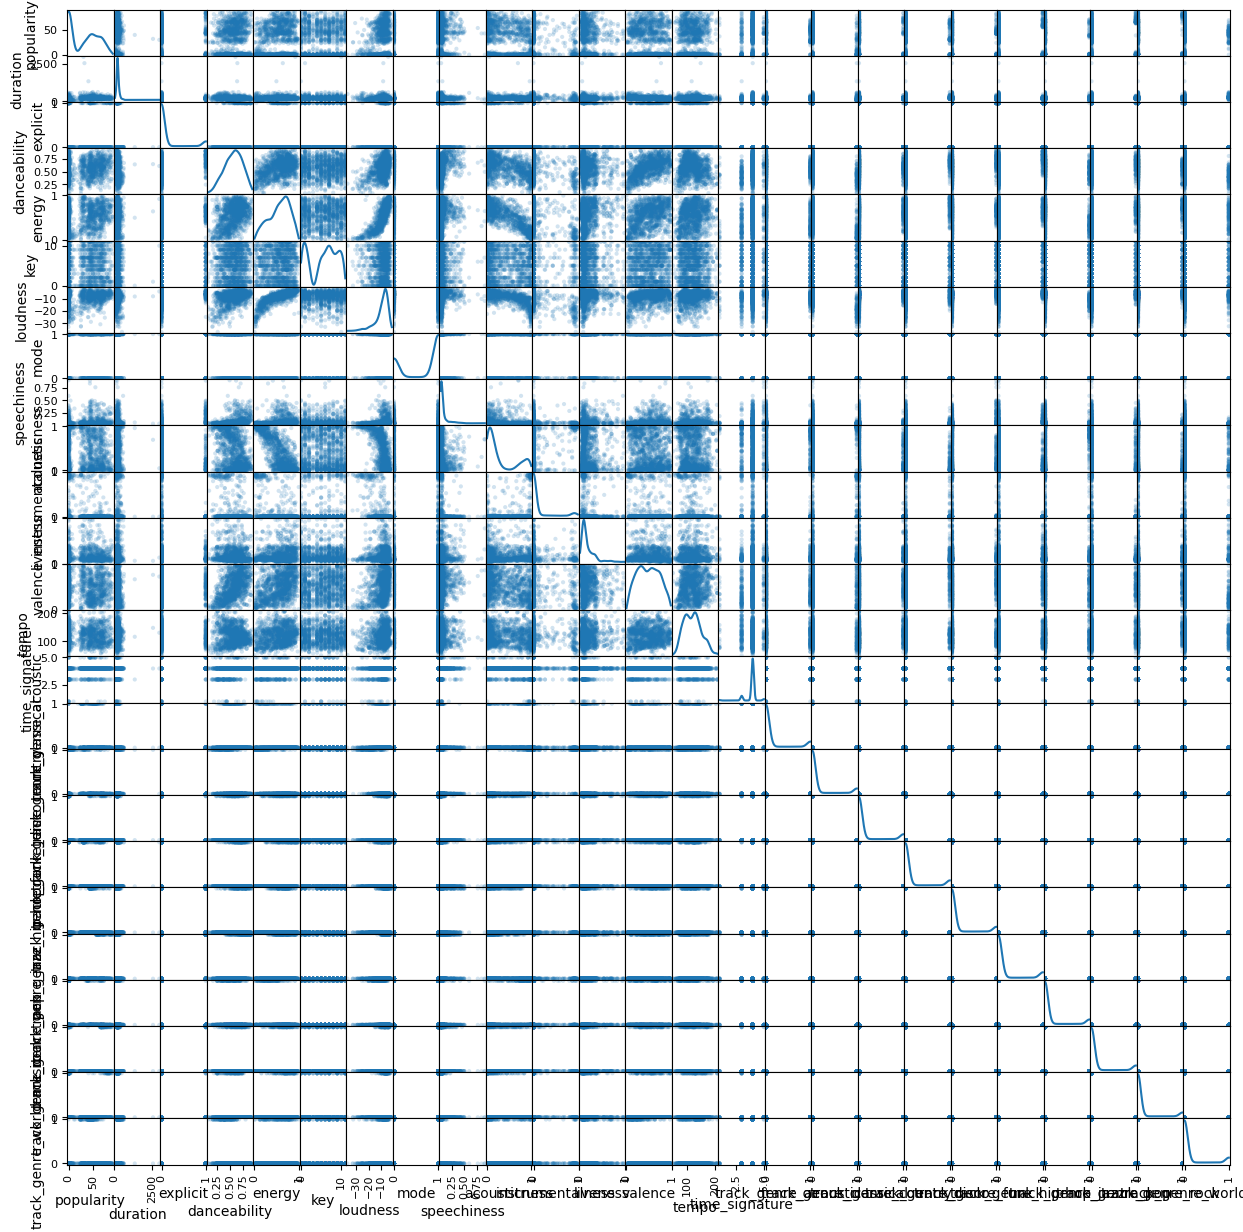

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(tracks_data, alpha = 0.2, figsize = (15, 15), diagonal = 'kde')
plt.show()

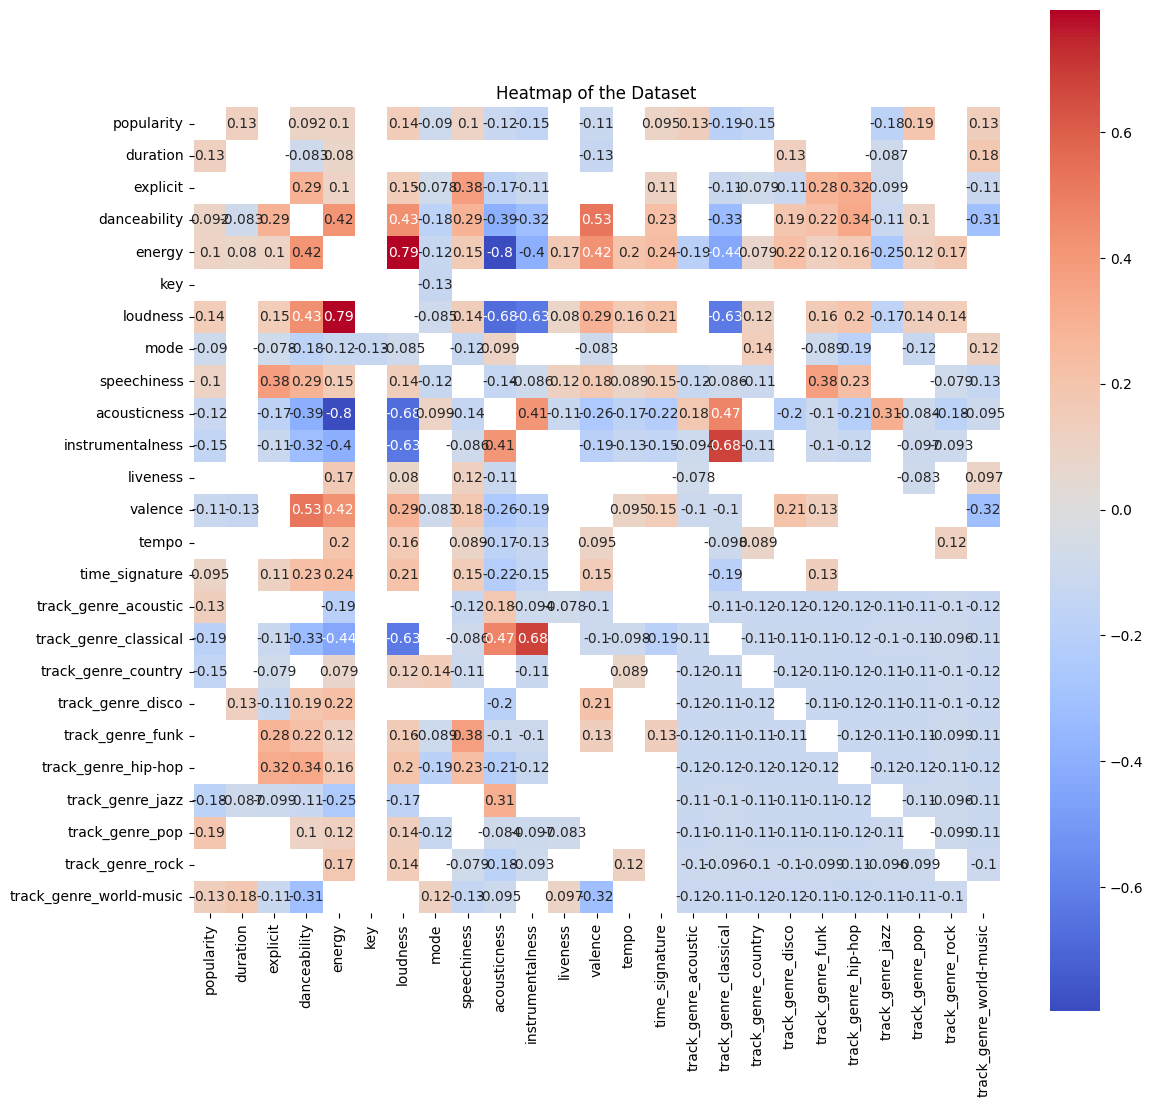

In [8]:
from scipy.stats import pearsonr

## Calculate the correlations between the columns
tracks_corrs = tracks_data.corr(method='pearson')

## Calculate the p-value, as the second element of the response from the pearsonr function. 
pval = tracks_data.corr(method=lambda x, y: pearsonr(x, y)[1])

## Establish the mask, to hide values without a given statistical significance
ptg_stat_sig = 0.1/20
mask = pval > ptg_stat_sig

## Plot the correlation matrix using seaborn's heatmap function
plt.subplots(figsize=(13, 13))
sns.heatmap(tracks_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)
plt.title('Heatmap of the Dataset')
plt.show()

# Linear Regressions

In [9]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


x = tracks_data[['duration','energy', 'loudness','acousticness','instrumentalness','track_genre_classical','track_genre_jazz','track_genre_pop']]
y = tracks_data['popularity']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
mse = mean_squared_error(y, predictions)
print(mse)
    
print_model = model.summary()
print(print_model)

723.2638901797005
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     20.68
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           1.07e-29
Time:                        17:58:15   Log-Likelihood:                -6142.9
No. Observations:                1304   AIC:                         1.230e+04
Df Residuals:                    1295   BIC:                         1.235e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const       

In [10]:
from sklearn.preprocessing import PolynomialFeatures

x = tracks_data[['duration','energy', 'loudness','acousticness','instrumentalness','track_genre_classical','track_genre_jazz','track_genre_pop']]
y = tracks_data['popularity']

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
x = poly.fit_transform(x)
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)


# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

mse = mean_squared_error(y, predictions)
print(mse)    

 
print_model = model.summary()
print(print_model)

682.8087230488053
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     7.488
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           4.23e-31
Time:                        17:58:17   Log-Likelihood:                -6105.4
No. Observations:                1304   AIC:                         1.228e+04
Df Residuals:                    1270   BIC:                         1.245e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.2838     19.122  

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the data
x = tracks_data[['duration','energy', 'loudness','acousticness','instrumentalness','track_genre_classical','track_genre_jazz','track_genre_pop']]
y = tracks_data['popularity']

# Create the polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_poly, y)

# Make predictions
y_pred = model.predict(x_poly)

model = sm.OLS(y, x_poly).fit()
predictions = model.predict(x_poly) 

mse = mean_squared_error(y, predictions)
print(mse)    
 
print_model = model.summary()
print(print_model)

675.9002852435304
                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              55.89
Date:                Sat, 13 Jan 2024   Prob (F-statistic):                   2.14e-240
Time:                        17:58:21   Log-Likelihood:                         -6098.8
No. Observations:                1304   AIC:                                  1.227e+04
Df Residuals:                    1266   BIC:                                  1.247e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

# Classifiers

In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, auc, roc_curve,  accuracy_score

high_popularity = 75

tracks_data_pop = tracks_data
tracks_data_pop['high_popularity'] = (tracks_data['popularity'] >= high_popularity)
tracks_data_pop = tracks_data.drop(columns=['popularity'])
 

X = tracks_data_pop.drop(['high_popularity'], axis=1)
y = tracks_data_pop.high_popularity

seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = seed)


In [47]:
##  LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
 
## Criar o modelo
model = LogisticRegression(max_iter = 1250)
model.fit(X_train,y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('<'.rjust(20)+str(high_popularity),'>='+str(high_popularity)))
print ('{}:  {}  |   {}'.format('Predicted <'.rjust(14)+str(high_popularity), cm[0,0], cm[1,0]))
print ('{}:    {}  |   {}'.format('Predicted >='.rjust(14)+str(high_popularity), cm[0,1], cm[1,1]))
print('\nModel Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_logistic_pred = model.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()


                   Actual
                   <75  |  >=75
   Predicted <75:  252  |   9
  Predicted >=75:    0  |   0

Model Error: 3.45%


In [48]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 9.61571551e-04  1.27641446e+00  1.31960090e-01 -4.95769403e-01
  -3.54466615e-02  6.88172685e-02  8.17742314e-02  1.20610619e-01
  -8.30871143e-01  7.59560875e-02 -7.16995391e-01 -6.79986106e-01
  -9.01160548e-03  1.07358001e-01 -1.17325297e+00 -2.63051748e-01
   4.31580202e-01 -7.08724875e-01 -3.56308923e-01  5.79501775e-01
  -8.91940081e-01  1.39064651e+00  2.13382881e+00 -1.23230827e+00]]
Intercept: [-1.34342771]


In [14]:
## lINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
 
## Criar o modelo
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('<'.rjust(20)+str(high_popularity),'>='+str(high_popularity)))
print ('{}:  {}  |  {}'.format('Predicted <'.rjust(14)+str(high_popularity), cm[0,0], cm[1,0]))
print ('{}:    {}  |  {}'.format('Predicted >='.rjust(14)+str(high_popularity), cm[0,1], cm[1,1]))
print('\nModel Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_LDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()


                   Actual
                   <75  |  >=75
   Predicted <75:  246  |  5
  Predicted >=75:    6  |  4

Model Error: 4.21%


In [15]:
## QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Criar o modelo
model = QuadraticDiscriminantAnalysis()
model.fit(X_train,y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('<'.rjust(20)+str(high_popularity),'>='+str(high_popularity)))
print ('{}:    {}  |   {}'.format('Predicted <'.rjust(14)+str(high_popularity), cm[0,0], cm[1,0]))
print ('{}:  {}  |   {}'.format('Predicted >='.rjust(14)+str(high_popularity), cm[0,1], cm[1,1]))
print('\nModel Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_QDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()


                   Actual
                   <75  |  >=75
   Predicted <75:    0  |   0
  Predicted >=75:  252  |   9

Model Error: 96.55%


C:\Users\jpmrr\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jpmrr\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\jpmrr\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\jpmrr\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\jpmrr\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\jpmrr\AppData\Roaming\Python\P

In [17]:
## NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
 
## Criar o modelo
model = GaussianNB()
model.fit(X_train, y_train)
 
## Prevê os próximos resultados
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 
print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('<'.rjust(20)+str(high_popularity),'>='+str(high_popularity)))
print ('{}:  {}  |   {}'.format('Predicted <'.rjust(14)+str(high_popularity), cm[0,0], cm[1,0]))
print ('{}:  {}  |   {}'.format('Predicted >='.rjust(14)+str(high_popularity), cm[0,1], cm[1,1]))
print('\nModel Error: {:.2f}%'.format(100-accuracy_score(y_pred, y_test)*100))
 
## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_GNB_pred = model.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()


                   Actual
                   <75  |  >=75
   Predicted <75:  147  |   0
  Predicted >=75:  105  |   9

Model Error: 40.23%


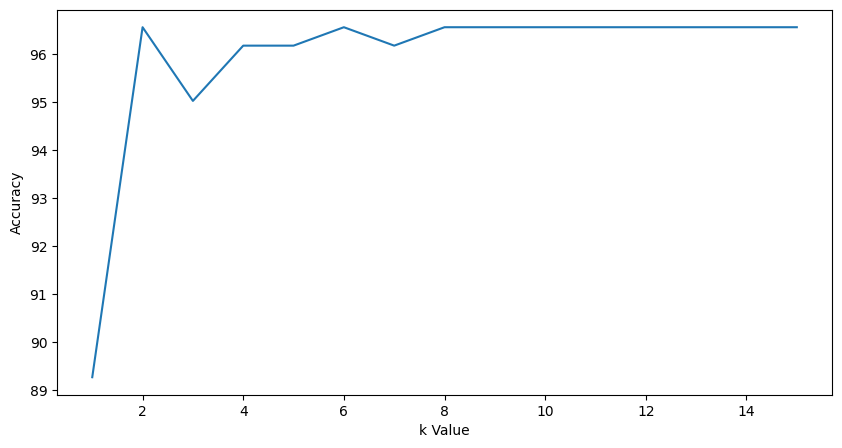


                   Actual
                   <75  |  >=75
   Predicted <75:  252  |   9
  Predicted >=75:    0  |   0

Model Error: 3.45%


In [68]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
 
 
def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):
    
    ## Create the model and fit the data to it
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
 
    ## Predict the classification and print the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    
    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(25))
        print ('{}  |  {}'.format('<'.rjust(20)+str(high_popularity),'>='+str(high_popularity)))
        print ('{}:  {}  |   {}'.format('Predicted <'.rjust(14)+str(high_popularity), cm[0,0], cm[1,0]))
        print ('{}:    {}  |   {}'.format('Predicted >='.rjust(14)+str(high_popularity), cm[0,1], cm[1,1]))
        print('\nModel Error: {:.2f}%'.format(100-accuracy_val))
    
    return model, accuracy_val
 
 
 
## Initialize a list to store the accuracies
accuracies = []
knn_limit = 15
 
## Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)

## Plot the results
plt.subplots(figsize=(10, 5))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()
 
## Guarda Informação Importante
model, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=12, verbosity=1)
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_KNN_pred = model.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
## Calcula as curvas
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
#lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)
 
 
 
## Mostra os resultados da AUC
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
#print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.5f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))

                      AUC
                LDA: 0.933
Logistic Regression: 0.92637
        Naive Bayes: 0.916
                KNN: 0.599


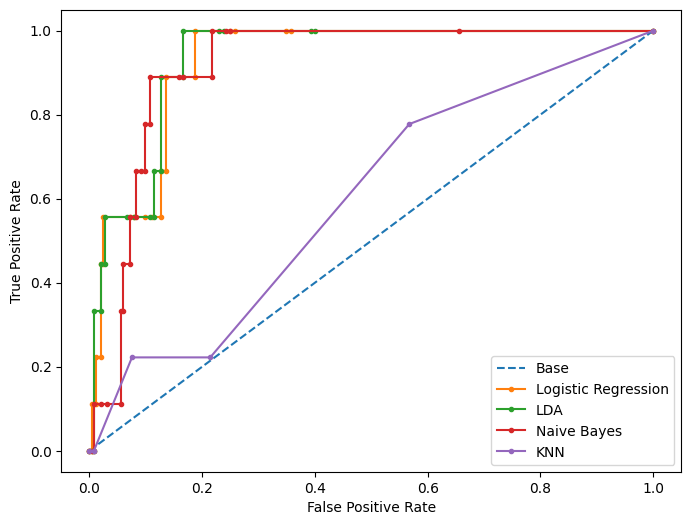

In [71]:
# Plot the ROC curve for the model
plt.subplots(figsize=(8, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
#plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Tree-Based Methods

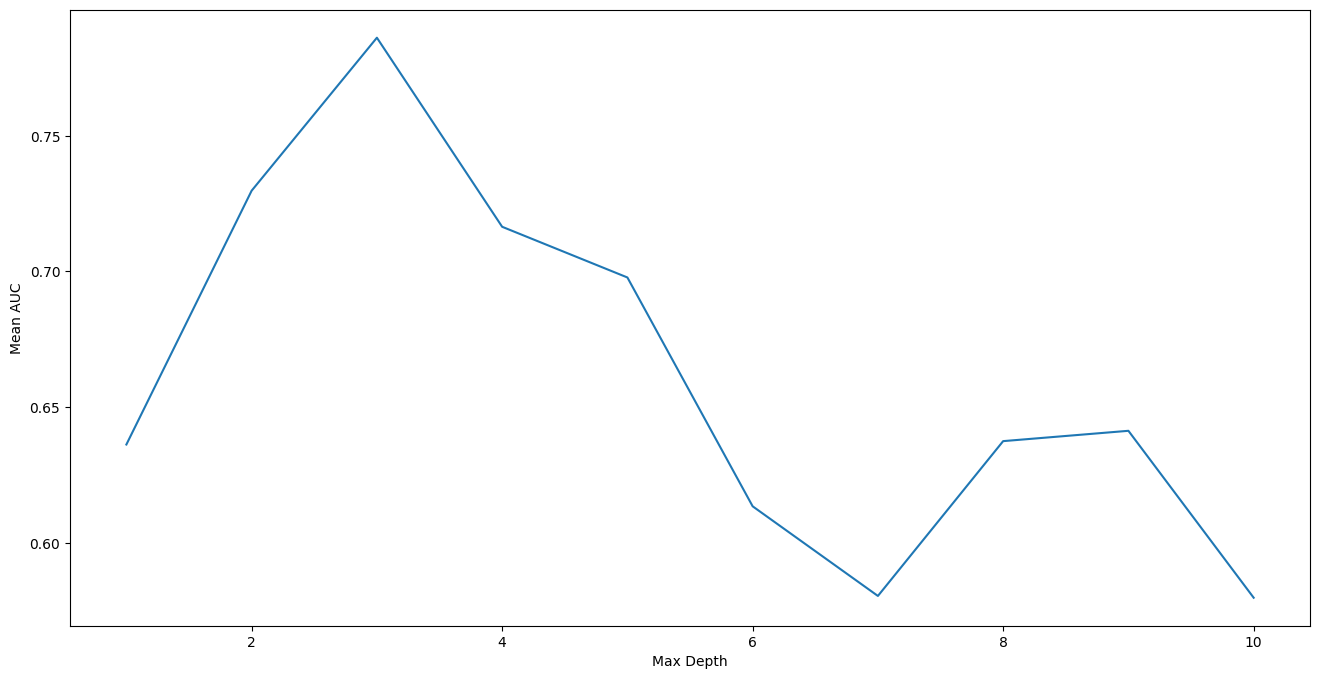

In [72]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=12, scoring='roc_auc')
clf.fit(X_train,y_train)

cv_results1 = pd.DataFrame(clf.cv_results_)
plt.plot(cv_results1['param_max_depth'], cv_results1['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Mean AUC')
plt.show()

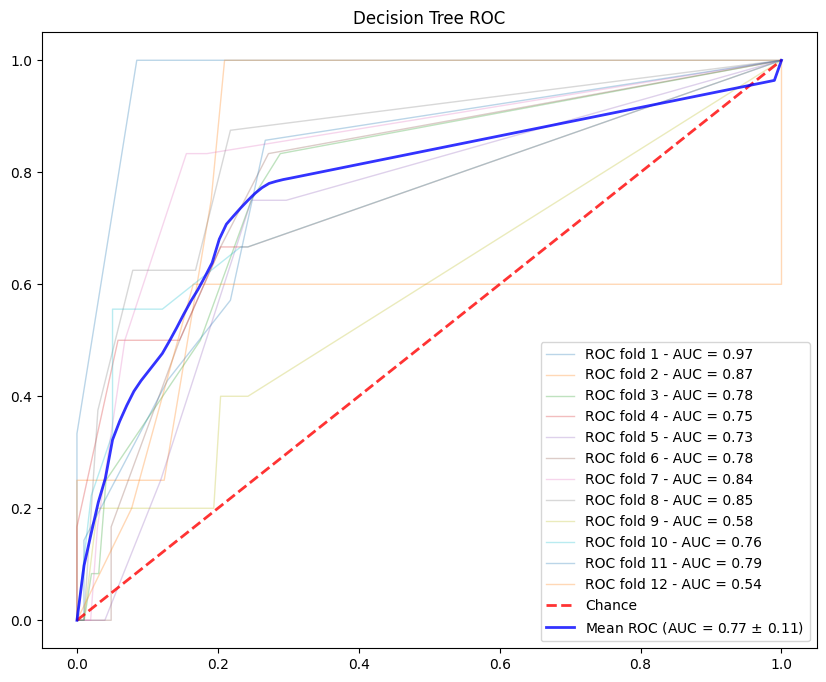

In [75]:
clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(X_train, y_train)

X_train = X_train.reindex()

y_pred = clf_dt.predict(X_test)


# KFold cross validation with 12 folds
kfold = KFold(n_splits=12, shuffle=True, random_state=seed)

tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(10, 8))

for i, (train,test) in enumerate(kfold.split(X,y)):
    clf_dt.fit(X.loc[train], y[train])
    y_proba = clf_dt.predict_proba(X.loc[test]) 
    fpr, tpr, _ = roc_curve(y[test], y_proba[:,1])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean roc curve auc
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Decision Tree ROC",
)

ax.legend(loc="lower right")
plt.show()

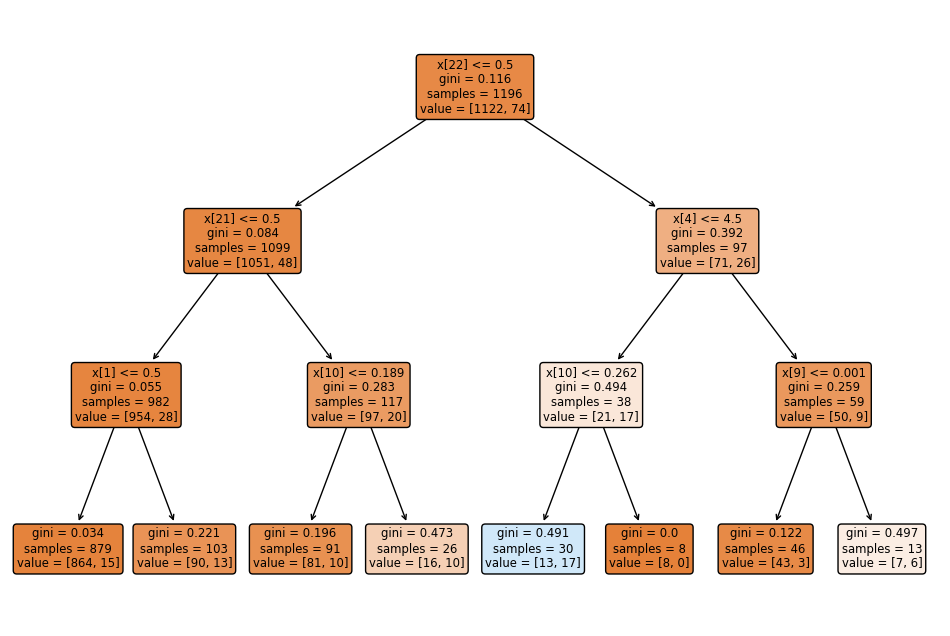

In [29]:
from sklearn import tree

plt.figure(figsize=(12, 8))

# Plot the decision tree
tree.plot_tree(clf_dt, filled=True, rounded=True)

# Show the plot
plt.show()

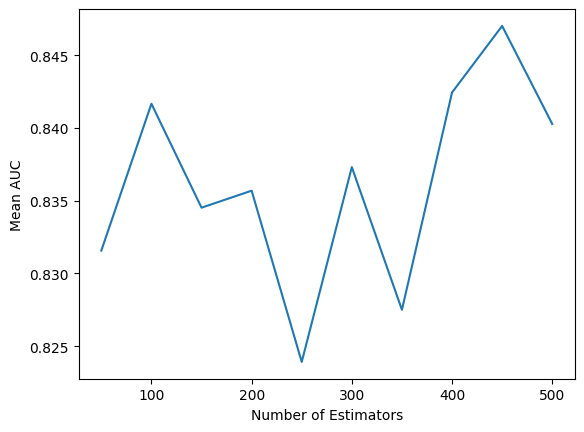

In [30]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=12, scoring='roc_auc')
clf.fit(X_train,y_train)

cv_results1 = pd.DataFrame(clf.cv_results_)
plt.plot(cv_results1['param_n_estimators'], cv_results1['mean_test_score'])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean AUC')
plt.show()

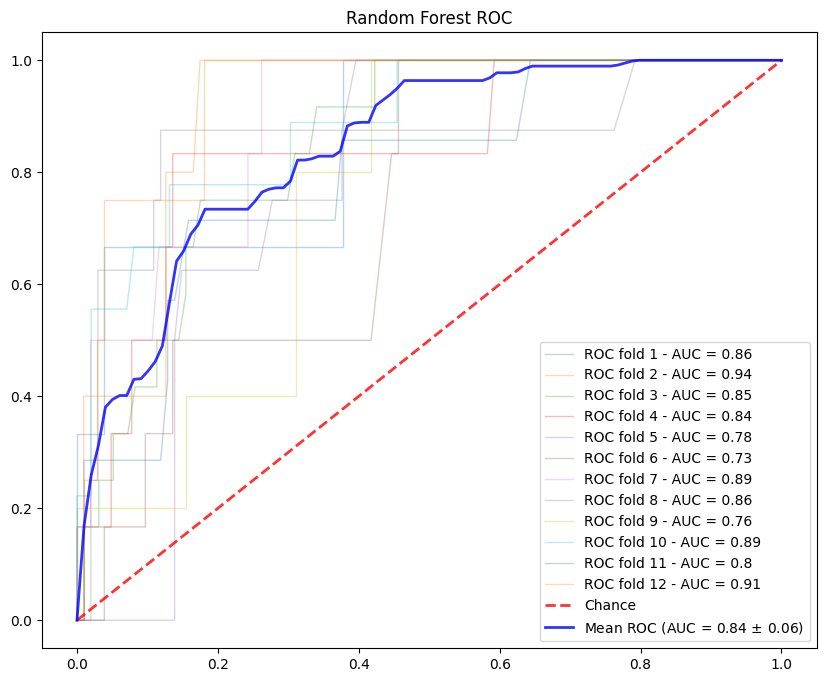

In [76]:
# Random Forest Classifier
clf_rfc = RandomForestClassifier(n_estimators=450, random_state=seed)


tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(10,8))

for i, (train,test) in enumerate(kfold.split(X,y)):
    clf_rfc.fit(X.loc[train], y[train])
    y_proba = clf_rfc.predict_proba(X.loc[test]) 
    fpr, tpr, _ = roc_curve(y[test], y_proba[:,1])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean roc curve auc
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Random Forest ROC",
)

ax.legend(loc="lower right")
plt.show()

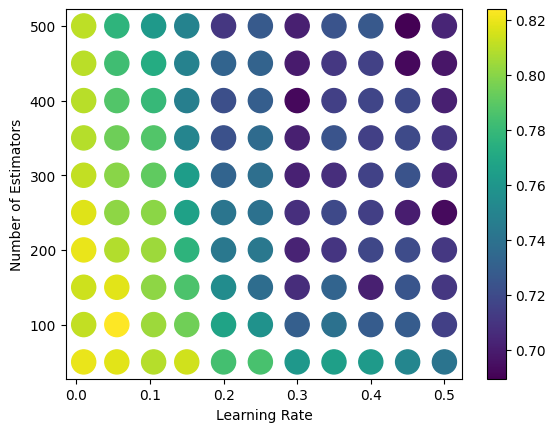

In [32]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
                   'learning_rate': [0.01, 0.055, 0.105, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}]
clf = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=12, scoring='roc_auc')
clf.fit(X_train,y_train)

cv_results = pd.DataFrame(clf.cv_results_)

plt.scatter(cv_results.param_learning_rate, cv_results.param_n_estimators, c=cv_results['mean_test_score'], s=300)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.colorbar()
plt.show()

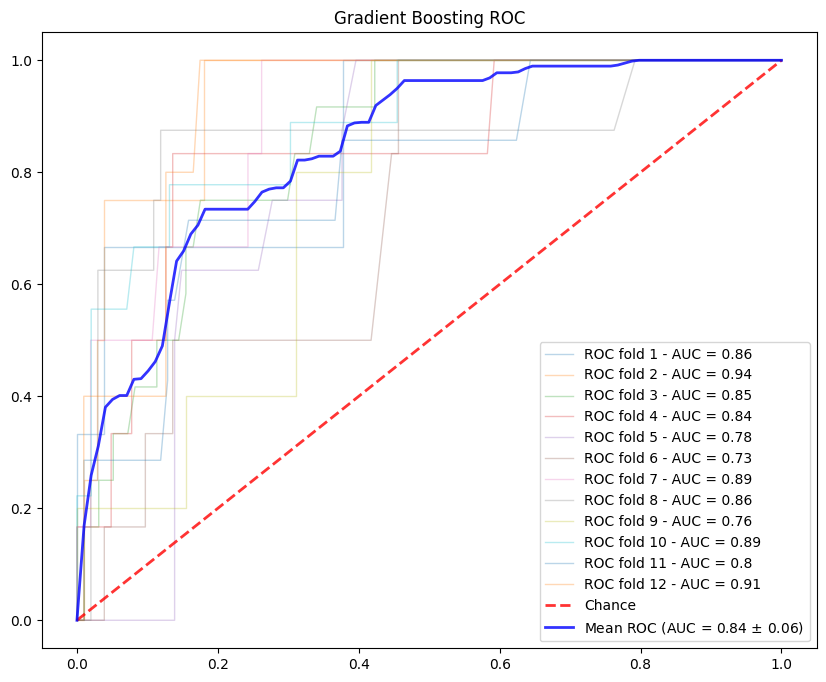

In [77]:
boosted_demo = GradientBoostingRegressor(n_estimators = 100, 
                                           learning_rate = 0.05, 
                                           max_depth = 7, 
                                           random_state = 1)

boosted_demo.fit(X_train, y_train)

y_pred = boosted_demo.predict(X_test)

tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(10,8))

for i, (train,test) in enumerate(kfold.split(X,y)):
    clf_rfc.fit(X.loc[train], y[train])
    y_proba = clf_rfc.predict_proba(X.loc[test]) 
    fpr, tpr, _ = roc_curve(y[test], y_proba[:,1])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean roc curve auc
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Gradient Boosting ROC",
)

ax.legend(loc="lower right")
plt.show()

['energy', 'speechiness', 'acousticness', 'track_genre_rock']


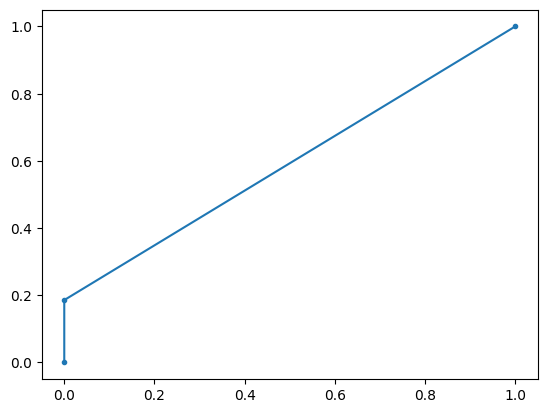

          AUC Score: 0.593


In [34]:
from sklearn.feature_selection import SequentialFeatureSelector as sk_sfs

boosted_model = GradientBoostingRegressor(n_estimators = 100, 
                                         learning_rate = 0.01, 
                                         max_depth = 6, 
                                         random_state = 1)

sk_sfs1 = sk_sfs(boosted_model,
                n_features_to_select=4,
                direction='forward',
                scoring='roc_auc',
                cv=12)

# Perform SFS
sk_sfs1 = sk_sfs1.fit(X_train, y_train)

# Which features?
feat_cols = list(sk_sfs1.get_support(indices=True))
feat_cols1 = list(sk_sfs1.get_feature_names_out())
print(feat_cols1)

# Build full model with selected features
boosted_model.fit(X_train[feat_cols1], y_train)
y_train_pred =boosted_model.predict(X_train[feat_cols1])
y_train_pred = abs(np.rint(y_train_pred))

lr_fpr1, lr_tpr1, _ = roc_curve(y_train, y_train_pred)
plt.plot(lr_fpr1, lr_tpr1, marker='.')
plt.show()
print('{}: {:.3f}'.format('AUC Score'.rjust(19), roc_auc_score(y_train, y_train_pred)))

# Neural Networks

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = tracks_data.drop(['popularity'], axis=1)
y = tracks_data.popularity


## Create the transformer from the input matrix
transformer_X = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(transformer_X.transform(X), columns = X.columns)

## Create the transformer from the output vector
transformer_y = StandardScaler().fit(tracks_data[['popularity']])
y_scaled = pd.DataFrame(transformer_y.transform(tracks_data[['popularity']]), columns = ['popularity'])

In [36]:
from sklearn.model_selection import train_test_split

## Use the train_test_split function to divide the dataset
seed = 0
X_train, X_val, y_train, y_val = train_test_split(X_scaled.values, y_scaled.values, train_size = 0.80, random_state = seed)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size = 0.80, random_state = seed)

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)

In [38]:
# Determine the number of input features
n_features = X_train.shape[1]

# Define model
model = Sequential()
model.add(Dense(40, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer
model.compile(
    optimizer = Adam(learning_rate=1e-4),
    loss = MeanSquaredError()
)

# Fit the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0, validation_data=(X_val, y_val))

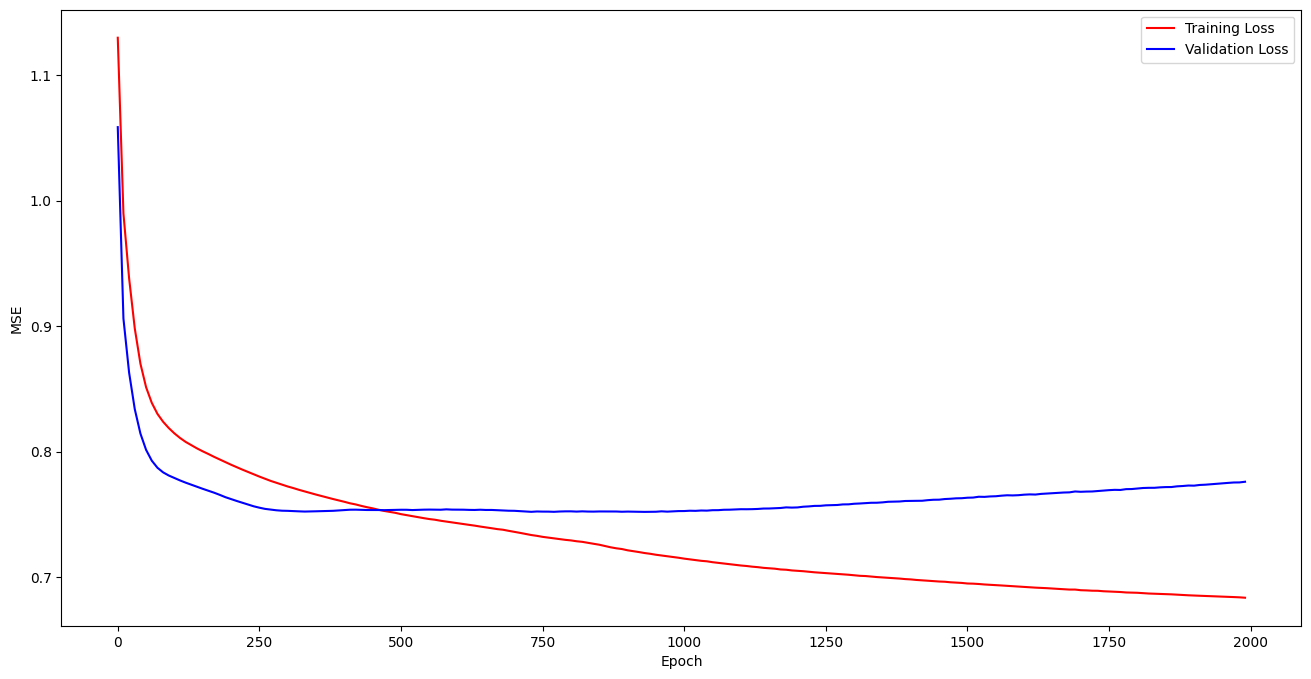

In [39]:
losses = pd.DataFrame(data = {
    'epoch': [(i // 10) * 10 for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()

fig, ax = plt.subplots()
ax.plot(losses.epoch, losses.loss, 'r-', label = 'Training Loss')
ax.plot(losses.epoch, losses.val_loss, 'b-', label = 'Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.legend()
plt.show()

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1040      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1881 (7.35 KB)
Trainable params: 1881 (7.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
params = [[40, 20, 1e-4, 500, 32],
          [200, 100, 1e-5, 1500, 16],
          [10, 5, 1e-4, 3000, 32],
          [100, 50, 1e-4, 750, 64]]

results_df = pd.DataFrame(columns = ['resid', 'x_axis', 'label'])
losses_df = pd.DataFrame(columns = ['epoch', 'loss', 'val_loss', 'label'])

for i in range(len(params)):
    
    # Print iteration
    print('Iteration {}/{}'.format(i+1, len(params)))
    
    # Define model
    model = Sequential()
    model.add(Dense(params[i][0], activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(params[i][1], activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='sigmoid'))

    # Define the optimizer
    model.compile(
        optimizer = Adam(learning_rate=params[i][2]),
        loss = MeanSquaredError()
    )

    # Fit the model
    history = model.fit(X_train, y_train, epochs=params[i][3], batch_size=params[i][4],
                        verbose=0, validation_data=(X_val, y_val))
    
    # Store the values
    yhat = model.predict(X_test)
    resid = transformer_y.inverse_transform(yhat) - transformer_y.inverse_transform(y_test)
    x_axis = transformer_y.inverse_transform(y_test)
    
    data_to_append_1 = {
    'resid': resid.reshape(-1,),
    'x_axis': x_axis.reshape(-1,),
    'label': ','.join([str(j) for j in params[i]])}
    
    df_to_append_1 = pd.DataFrame(data_to_append_1)
    results_df = pd.concat([results_df, df_to_append_1], ignore_index=True)
    
    
    data_to_append_2 = {
            'epoch': [(i // 10)*10 for i in history.epoch], 
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'label': ','.join([str(j) for j in params[i]])}
    
    df_to_append_2 = pd.DataFrame(data_to_append_2)
    losses_df = pd.concat([losses_df, df_to_append_2], ignore_index=True)

Iteration 1/4
2/2 [==============================] - 0s 2ms/step
Iteration 2/4
2/2 [==============================] - 0s 3ms/step
Iteration 3/4
2/2 [==============================] - 0s 3ms/step
Iteration 4/4
2/2 [==============================] - 0s 3ms/step


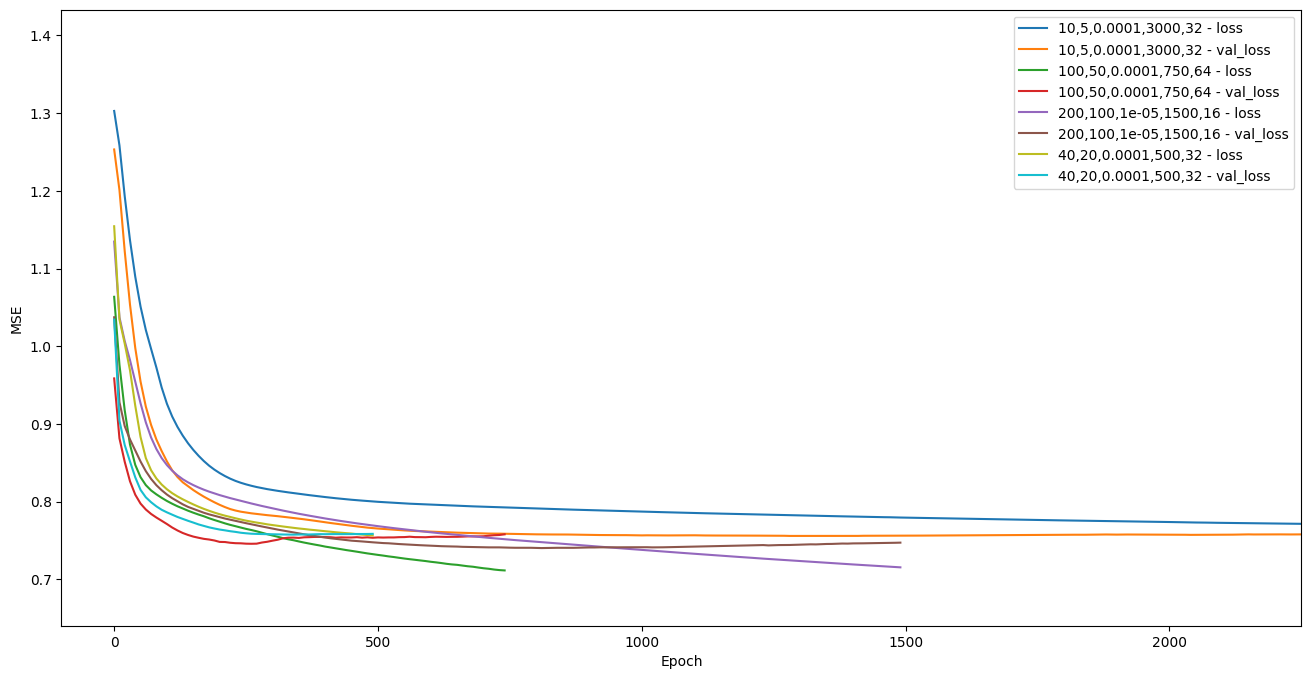

In [42]:
losses = losses_df.groupby(['epoch', 'label']).mean().reset_index().sort_values(by = ['label', 'epoch'])
losses = pd.melt(losses, id_vars = ['epoch', 'label'], value_vars = ['loss', 'val_loss'], var_name = 'test')
losses['label'] = losses['label'] + ' - ' + losses['test']
losses = losses.sort_values(by = ['label', 'epoch'])

labels = losses.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
         'tab:purple', 'tab:brown', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots()
for i in range(len(labels)):
    
    idxs = losses.label == labels[i]
    
    ax.plot(
        losses[idxs].epoch, losses[idxs].value, c=colors[i], label=labels[i]
    )

ax.legend()
ax.grid(False)
ax.set_xlim([-100, 2250])
ax.set_ylim([losses.value.min()*0.9, losses.value.max()*1.1])
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
plt.show()

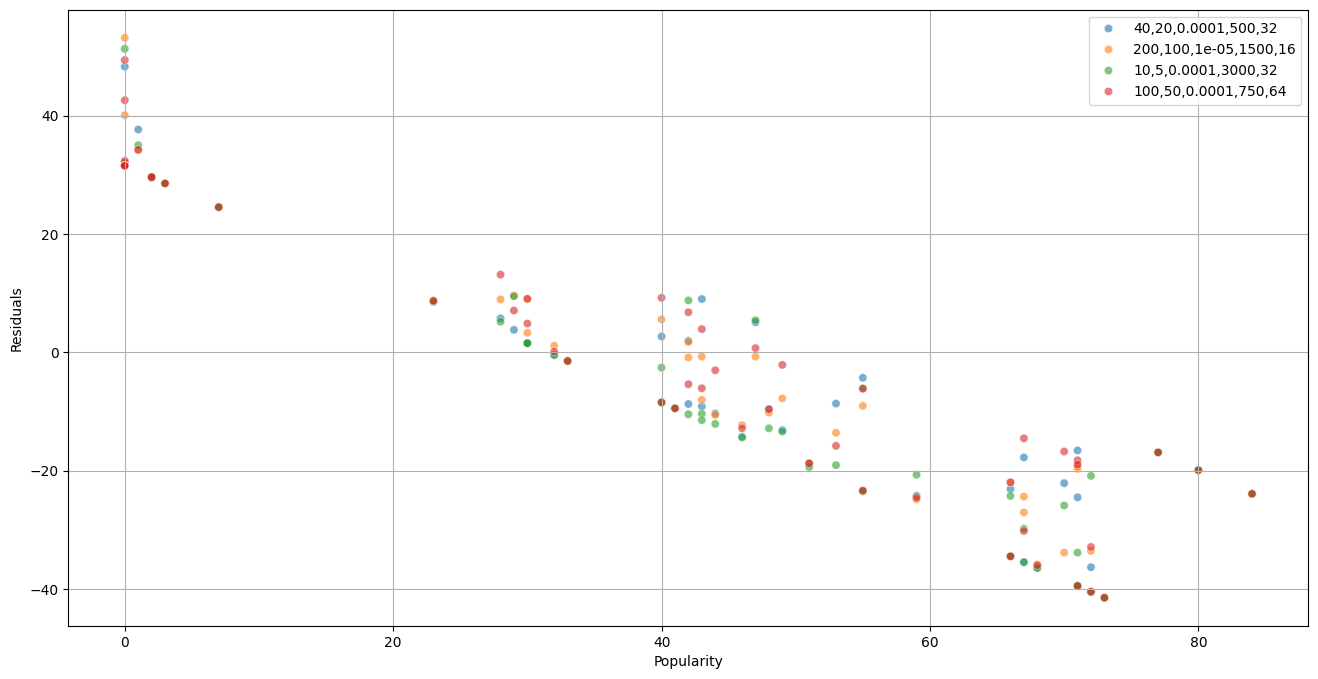

In [43]:
labels = results_df.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig, ax = plt.subplots()

sns.scatterplot(data=results_df, x='x_axis', y='resid', hue='label', ax=ax, alpha=0.6)

ax.legend()
ax.grid(True)
ax.set_ylabel('Residuals')
ax.set_xlabel('Popularity')
plt.show()

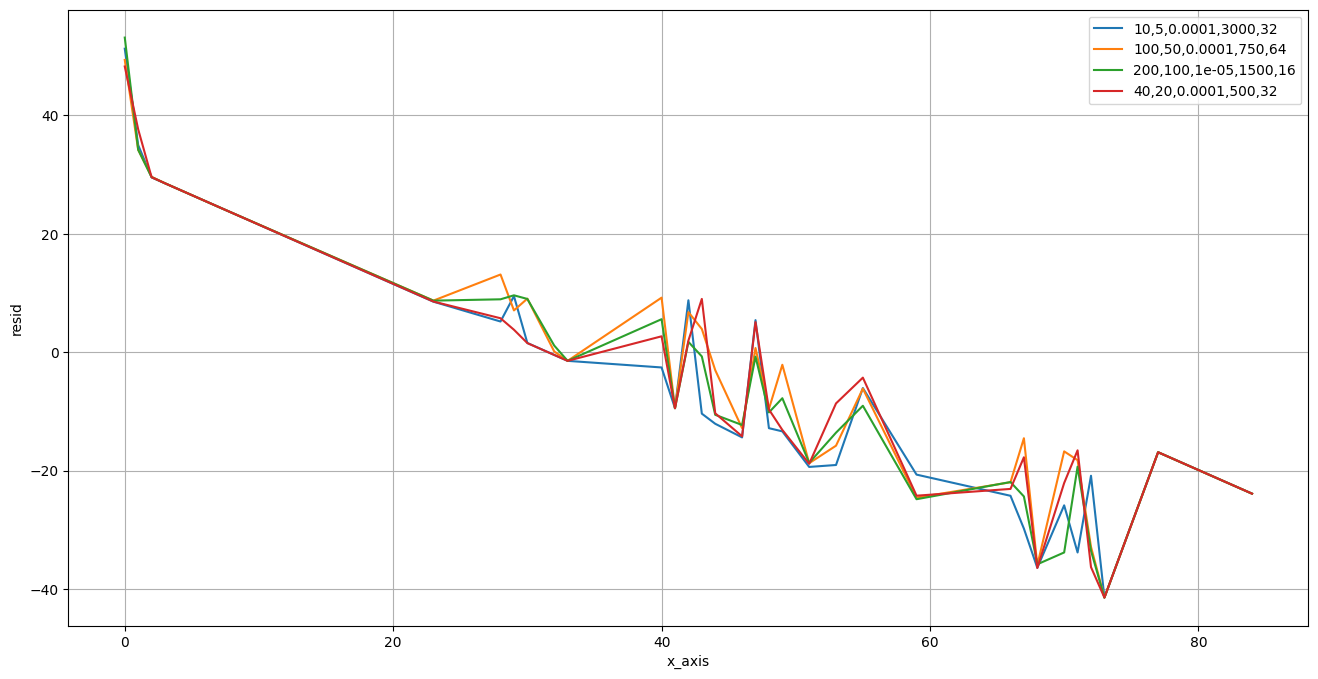

In [44]:
mean_results_df = results_df.groupby(['x_axis', 'label']).max().reset_index().sort_values(by = ['label', 'x_axis'])

labels = mean_results_df.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig, ax = plt.subplots()
sns.lineplot(data=mean_results_df, x='x_axis', y='resid', hue='label')

ax.legend()
ax.grid(True)

plt.show()